<a href="https://colab.research.google.com/github/Noam-shahar/Moving-square---AI-course/blob/main/Day_1_AI_course_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final code:

Link to prompts: https://chat.openai.com/share/206ce8f9-ff7b-4f19-a3fb-d1b893299494



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

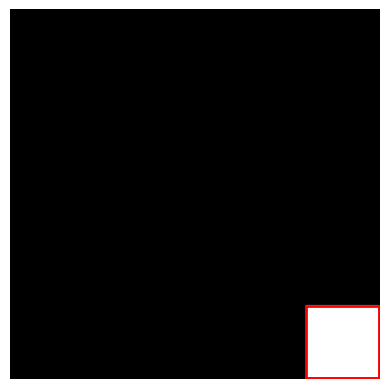

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

# Creating a black 255x255 matrix
black_matrix = np.zeros((255, 255))

# Setting a 50x50 square at the top left corner with a gray scale value of 100
square_size = 50
black_matrix[:square_size, :square_size] = 100

# Store the coordinates of the square's center
coordinates = []

# Create a figure without axes
fig, ax = plt.subplots()
ax.axis('off')

# Initialize an image plot with the initial black_matrix
img = ax.imshow(black_matrix, cmap='gray')

# Initialize a rectangle patch for the red square frame
red_square = plt.Rectangle((0, 0), square_size, square_size, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(red_square)

# Function to update the animation frames
def update(frame):
    global black_matrix

    # Calculate the new position for the square diagonally across the matrix
    new_pos = min(int(frame * 2), 205)  # Adjust speed by reducing frame scaling

    # Calculate the center coordinates of the square
    center_x = new_pos + square_size / 2
    center_y = new_pos + square_size / 2
    coordinates.append((center_x, center_y))  # Append the coordinates

    # Clear the previous position of the square
    black_matrix.fill(0)

    # Update the position of the square diagonally
    black_matrix[new_pos:new_pos + square_size, new_pos:new_pos + square_size] = 100

    # Update the image plot with the updated black_matrix
    img.set_array(black_matrix)

    # Update the position of the red square frame to track the white square
    red_square.set_xy((new_pos, new_pos))

    return img, red_square

# Create the animation with more frames for slower movement
ani = animation.FuncAnimation(fig, update, frames=103, interval=100, blit=True)

# Display the animation in the notebook using HTML
html_video = ani.to_jshtml()

# Save the animation as an HTML file (video format)
with open('animation_video.html', 'w') as f:
    f.write(html_video)

# Save the coordinates to a text file
with open('square_coordinates.txt', 'w') as f:
    for coord in coordinates:
        f.write(f'{coord[0]}, {coord[1]}\n')

# Download files to local machine
files.download('animation_video.html')
files.download('square_center_coordinates.txt')

# Display the generated HTML video
display(HTML(html_video))
